<a href="https://colab.research.google.com/github/TharinduGee/Prediction_Models/blob/main/Corbon_emission_predictor_Only_using_numeric_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow as tf;

In [3]:
record = pd.read_excel('https://www.epa.gov/system/files/documents/2022-04/22-tstcar-2022-04-15.xlsx');


In [4]:
record = record.dropna(thresh = 3000, axis='columns')
record = record.fillna(method= 'ffill',axis='rows')


In [5]:

train_record = record.sample(frac = 0.8, random_state = 3)
test_record = record.drop(train_record.index)



In [6]:
numeric_feature_names = []
for name in record.columns:
  if record[name].dtype != object:
    numeric_feature_names.append(name)

numeric_feature_names

['Model Year',
 'Test Veh Configuration #',
 'Test Veh Displacement (L)',
 'Rated Horsepower',
 '# of Cylinders and Rotors',
 '# of Gears',
 'Transmission Overdrive Code',
 'Equivalent Test Weight (lbs.)',
 'Axle Ratio',
 'N/V Ratio',
 'Shift Indicator Light Use Cd',
 'Test Procedure Cd',
 'Test Fuel Type Cd',
 'THC (g/mi)',
 'CO (g/mi)',
 'CO2 (g/mi)',
 'NOx (g/mi)',
 'CH4 (g/mi)',
 'RND_ADJ_FE',
 'DT-Inertia Work Ratio Rating',
 'DT-Absolute Speed Change Ratg',
 'DT-Energy Economy Rating',
 'Target Coef A (lbf)',
 'Target Coef B (lbf/mph)',
 'Target Coef C (lbf/mph**2)',
 'Set Coef A (lbf)',
 'Set Coef B (lbf/mph)',
 'Set Coef C (lbf/mph**2)']

In [7]:
train_numeric_features = train_record[numeric_feature_names]
test_numeric_features = test_record[numeric_feature_names]


In [8]:

train_target = train_numeric_features.pop("CO2 (g/mi)")
test_target = test_numeric_features.pop("CO2 (g/mi)")
train_numeric_features.head()

,Model Year,Test Veh Configuration #,Test Veh Displacement (L),Rated Horsepower,# of Cylinders and Rotors,# of Gears,Transmission Overdrive Code,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,...,RND_ADJ_FE,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2)
1806,2022,0,5.300,355,8.0,6,2,5500,3.42,24.6,...,12.5,1.008000,0.744000,0.7780,52.820,0.84090,0.032210,-9.810,-0.04400,0.035940
3525,2022,1,3.445,416,6.0,10,2,5000,2.76,20.1,...,23.1,0.420000,0.210000,-0.1700,39.631,0.15691,0.019578,18.271,-0.08591,0.020445
1240,2022,0,3.600,470,6.0,6,2,4250,3.73,31.8,...,16.3,0.541645,-0.375934,-1.0466,43.410,0.35550,0.020860,18.260,-0.25130,0.025700
3129,2022,3,5.600,400,8.0,9,2,6000,3.69,23.1,...,18.9,3.090000,2.030000,1.4700,37.190,0.04190,0.040570,16.810,-0.29760,0.040980
3729,2022,0,1.987,169,4.0,6,2,3375,3.94,37.9,...,37.3,1.310000,0.910000,0.2700,25.138,0.13072,0.019293,13.540,-0.08360,0.019998


In [9]:
tf.convert_to_tensor(train_numeric_features)

<tf.Tensor: shape=(3518, 27), dtype=float64, numpy=
array([[ 2.0220e+03,  0.0000e+00,  5.3000e+00, ..., -9.8100e+00,
        -4.4000e-02,  3.5940e-02],
       [ 2.0220e+03,  1.0000e+00,  3.4450e+00, ...,  1.8271e+01,
        -8.5910e-02,  2.0445e-02],
       [ 2.0220e+03,  0.0000e+00,  3.6000e+00, ...,  1.8260e+01,
        -2.5130e-01,  2.5700e-02],
       ...,
       [ 2.0220e+03,  0.0000e+00,  1.9840e+00, ...,  6.8800e+00,
        -1.5200e-01,  2.2130e-02],
       [ 2.0220e+03,  1.0000e+00,  2.0000e+00, ...,  4.9000e+00,
         1.5800e-01,  1.8920e-02],
       [ 2.0220e+03,  2.0000e+00,  3.4560e+00, ...,  1.1330e+01,
         2.6284e-01,  1.5807e-02]])>

In [10]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_numeric_features)

In [11]:
normalizer(train_numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 27), dtype=float32, numpy=
array([[ 0.2510773 , -0.6461372 ,  0.27780348,  0.22277802,  1.4018264 ,
        -0.22974658,  0.25003886,  1.121919  , -0.22757186, -0.1907779 ,
        -0.17446536,  0.04349321, -1.890736  ,  0.20158921, -0.27648124,
        -0.12516756,  2.8404562 , -0.10240007, -0.01768634, -0.03526393,
         0.00996929,  1.0968583 ,  1.8339957 ,  0.9195486 , -1.5511179 ,
        -0.46593025,  1.3915895 ],
       [ 0.2510773 ,  0.1982576 ,  0.00842676,  0.60059416,  0.28846708,
         1.0893039 ,  0.25003886,  0.5324757 , -0.754863  , -0.29725432,
        -0.17446536, -0.2571725 ,  0.3194214 , -0.40256923, -0.40757272,
        -0.71313316, -0.52303773, -0.08447495, -0.08340643, -0.0966454 ,
        -0.08768455,  0.01298299, -0.3218962 , -0.6272349 ,  0.78228235,
        -0.6043211 , -0.4441021 ],
       [ 0.2510773 , -0.6461372 ,  0.03093532,  0.93505436,  0.28846708,
        -0.22974658,  0.25003886, -0.35168928,  0.02009513, -0.02041564,
     

In [12]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  # model.compile(optimizer='adam',
  #               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  #               metrics=['accuracy'])
  
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [16]:
model = get_basic_model()
history = model.fit(train_numeric_features, train_target,validation_split = 0.2, verbose=4,  epochs=70, batch_size=5)

Epoch 1/70
Epoch 2/70
Epoch 3/70
Epoch 4/70
Epoch 5/70
Epoch 6/70
Epoch 7/70
Epoch 8/70
Epoch 9/70
Epoch 10/70
Epoch 11/70
Epoch 12/70
Epoch 13/70
Epoch 14/70
Epoch 15/70
Epoch 16/70
Epoch 17/70
Epoch 18/70
Epoch 19/70
Epoch 20/70
Epoch 21/70
Epoch 22/70
Epoch 23/70
Epoch 24/70
Epoch 25/70
Epoch 26/70
Epoch 27/70
Epoch 28/70
Epoch 29/70
Epoch 30/70
Epoch 31/70
Epoch 32/70
Epoch 33/70
Epoch 34/70
Epoch 35/70
Epoch 36/70
Epoch 37/70
Epoch 38/70
Epoch 39/70
Epoch 40/70
Epoch 41/70
Epoch 42/70
Epoch 43/70
Epoch 44/70
Epoch 45/70
Epoch 46/70
Epoch 47/70
Epoch 48/70
Epoch 49/70
Epoch 50/70
Epoch 51/70
Epoch 52/70
Epoch 53/70
Epoch 54/70
Epoch 55/70
Epoch 56/70
Epoch 57/70
Epoch 58/70
Epoch 59/70
Epoch 60/70
Epoch 61/70
Epoch 62/70
Epoch 63/70
Epoch 64/70
Epoch 65/70
Epoch 66/70
Epoch 67/70
Epoch 68/70
Epoch 69/70
Epoch 70/70


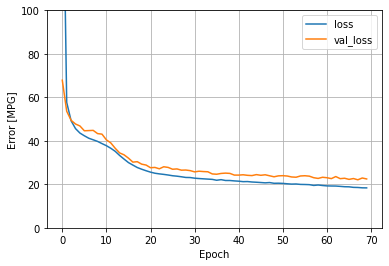

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [18]:
test_results = {}
test_results['dnn_model'] = model.evaluate(test_numeric_features, test_target, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [CO2 (g/mi)]']).T

,Mean absolute error [CO2 (g/mi)]
dnn_model,21.840305


In [19]:
test_predictions = model.predict(test_numeric_features).flatten()
